In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


In [139]:
class nn():
    def __init__(self,input_layer,hidden_layer,output_layer,lr=0.001):
        np.random.seed(42)
        self.input_layer=input_layer
        self.hidden_layer=hidden_layer
        self.hidden_layer2=8
        self.output_layer=output_layer
        self.lr=lr

        self.w1=np.random.randn(self.input_layer,self.hidden_layer)*0.1
        self.b1=np.zeros((1,self.hidden_layer))

        self.w2=np.random.randn(self.hidden_layer,self.hidden_layer2)*0.1
        self.b2=np.zeros((1,self.hidden_layer2))

        self.w3=np.random.randn(self.hidden_layer2,self.output_layer)*0.1
        self.b3=np.zeros((1,self.output_layer))

    def relu(self,z):
        return np.maximum(z,0)
    
    def relu_derivative(self,z):
        return (z > 0).astype(float)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def forward(self,x):
        self.z1=x@self.w1+self.b1
        self.a1=self.relu(self.z1)
        # print(self.a1)

        self.z2=self.a1@self.w2+self.b2
        self.a2=self.relu(self.z2)
        # print(self.a2)

        self.z3=self.a2@self.w3+self.b3
        self.y_pred=self.sigmoid(self.z3)

        return self.y_pred
    
    def backpropagation(self,x,y):
        m=y.shape[0]

        dz3=self.y_pred-y

        dw3=self.a2.T @ dz3/m
        db3=np.mean(dz3,axis=0,keepdims=True)


        da2=dz3 @ self.w3.T
        dz2=da2*self.relu_derivative(self.z2)
        dw2=self.a1.T @dz2/m
        db2=np.mean(dz2,axis=0,keepdims=True)

        da1=dz2 @ self.w2.T
        dz1=da1*self.relu_derivative(self.z1)
        dw1=x.T@dz1/m
        db1=np.mean(dz1,keepdims=True,axis=0)

        self.w1-=self.lr*dw1
        self.w2-=self.lr*dw2
        self.w3-=self.lr*dw3

        self.b1-=self.lr*db1
        self.b2-=self.lr*db2
        self.b3-=self.lr*db3
    def loss(self, y):
        eps = 1e-9
        return -np.mean(y*np.log(self.y_pred+eps) +
                        (1-y)*np.log(1-self.y_pred+eps))
        

In [150]:

data = pd.read_csv("dataset2.csv")

X = data.drop(columns=["motor"]).values
y = data["motor"].values.reshape(-1,1)



X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)


In [151]:
network=nn(9,16,1,0.001)

In [152]:
for epoch in range(0,20000):
    network.forward(x_train)
    los=network.loss(y_train)
    if epoch%2000 ==0:print(los)
    network.backpropagation(x_train,y_train)

0.6183014729115566
0.30458834192504397
0.2941089384091546
0.29113518847202063
0.28969000392512545
0.28831086812810847
0.2867182371486541
0.28475390520319516
0.2823424978076449
0.2791412947505909


In [143]:
'''# class weights (CRITICAL)
pos = np.sum(y_train==1)
neg = np.sum(y_train==0)

net.w1c = len(y_train)/(2*pos)
net.w0c = len(y_train)/(2*neg)

# ---------------- TRAIN ----------------
for epoch in range(20000):
    net.forward(X_train)
    loss = net.loss(y_train)

    if epoch%2000==0:
        print(f"epoch {epoch} loss {loss:.4f}")

    net.backpropagation(X_train,y_train)'''

'# class weights (CRITICAL)\npos = np.sum(y_train==1)\nneg = np.sum(y_train==0)\n\nnet.w1c = len(y_train)/(2*pos)\nnet.w0c = len(y_train)/(2*neg)\n\n# ---------------- TRAIN ----------------\nfor epoch in range(20000):\n    net.forward(X_train)\n    loss = net.loss(y_train)\n\n    if epoch%2000==0:\n        print(f"epoch {epoch} loss {loss:.4f}")\n\n    net.backpropagation(X_train,y_train)'

In [153]:
def predict(x):
    out=network.forward(x)
    
    return (out > 0.3).astype(int)

In [154]:
y_pred=predict(x_test)

In [155]:
acc=accuracy_score(y_pred,y_test)
acc

0.8486842105263158

In [156]:

g=[[38,1,83,89,43,0,0,0,2]]
f=predict(g)
f


array([[1]])

In [157]:
conf=confusion_matrix(y_test,y_pred)

<Axes: >

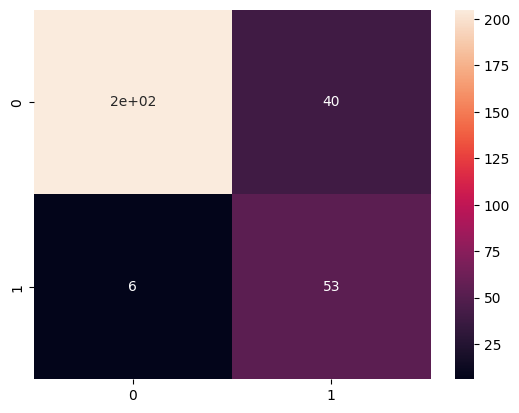

In [158]:
sns.heatmap(conf,annot=True)